In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # 3
from sklearn.neighbors import KNeighborsClassifier # 4

from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay , accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [17]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
label = LabelEncoder()
df['species'] = label.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

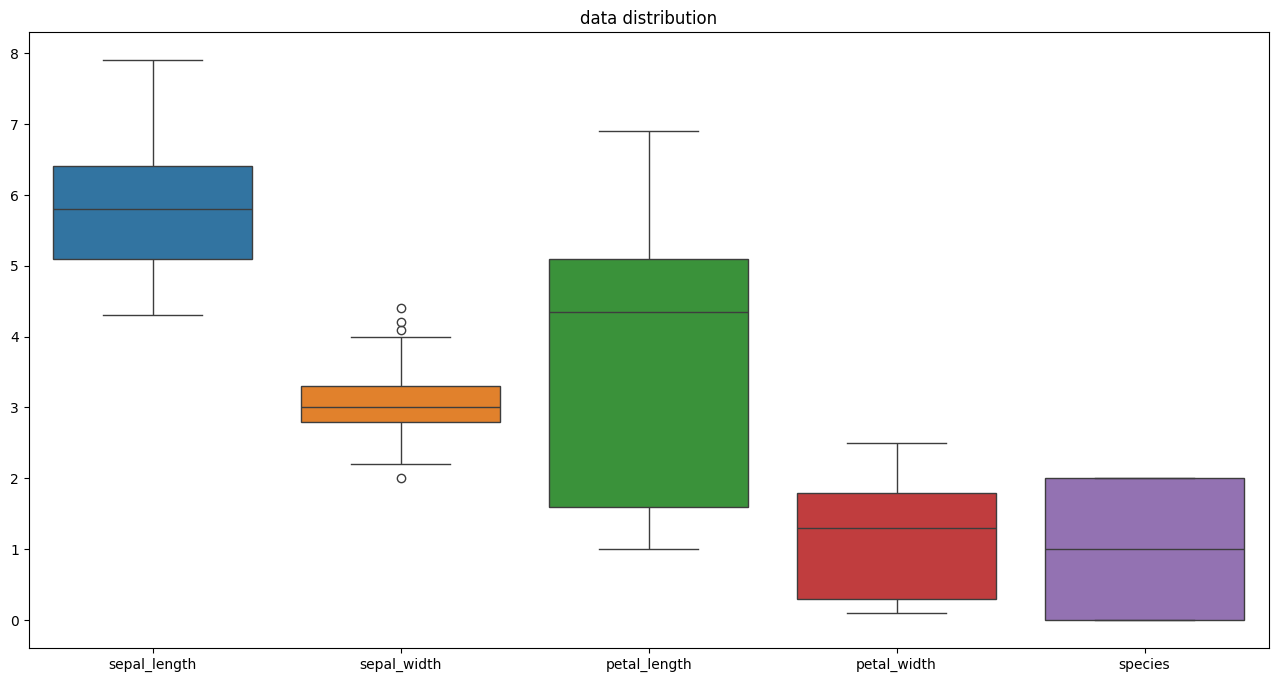

In [23]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.title("data distribution")
plt.show()


In [24]:
models = {'DecisionTree':DecisionTreeClassifier(),'RandomForest':RandomForestClassifier(),
          'KNeighbors':KNeighborsClassifier(),'SVM':SVC()}

In [34]:
x = df.iloc[:,:4]
y = df.iloc[:,4:]

In [35]:
results = []
for model in models.values():
    kf = KFold(n_splits=5, shuffle=True, random_state=42) 
    cv_result = cross_val_score(model,x,y,cv=kf)
    results.append(cv_result)

c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionW

In [36]:
results

[array([1.        , 0.96666667, 0.93333333, 0.93333333, 0.93333333]),
 array([1.        , 0.96666667, 0.93333333, 0.93333333, 0.96666667]),
 array([1.        , 1.        , 0.96666667, 0.93333333, 0.96666667]),
 array([1.        , 1.        , 0.93333333, 0.93333333, 0.96666667])]

C:\Users\omar\AppData\Local\Temp\ipykernel_15296\1268279410.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=models.keys())


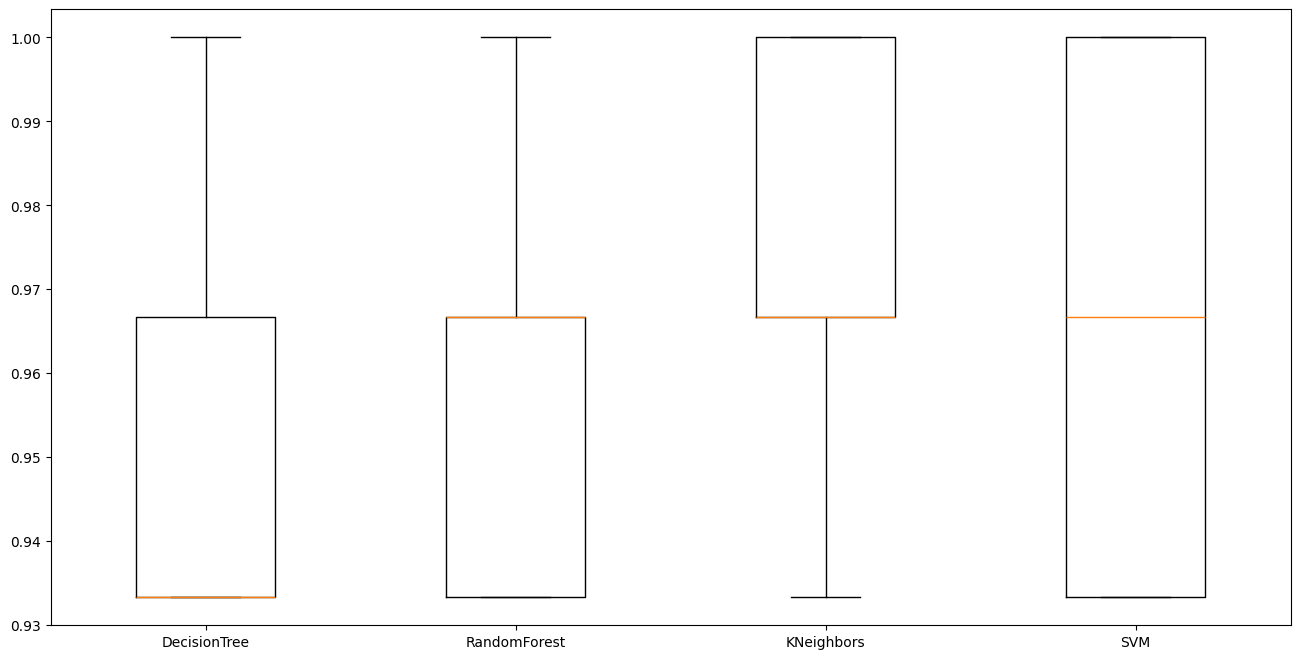

In [37]:
plt.figure(figsize=(16,8))
plt.boxplot(results,labels=models.keys())
plt.show()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
for name, model in models.items():
    model.fit(x_train, y_train) 
    train_score=model.score(x_train, y_train)
    print(f"{name} train Set Accuracy: {train_score}")

DecisionTree train Set Accuracy: 1.0


c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest train Set Accuracy: 1.0
KNeighbors train Set Accuracy: 0.9666666666666667
SVM train Set Accuracy: 0.975


c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
for name, model in models.items():
    model.fit(x_train, y_train) 
    test_score=model.score(x_test, y_test)
    print(f"{name} Test Set Accuracy: {test_score}")

DecisionTree Test Set Accuracy: 1.0


c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest Test Set Accuracy: 1.0
KNeighbors Test Set Accuracy: 1.0
SVM Test Set Accuracy: 1.0


c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# DecisionTree
DecisionTree = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTree.fit(x_train,y_train)
model

DecisionTreeClassifier()

In [41]:
# accuracy
train_score = model.score(x_train,y_train)

y_pred = model.predict(x_test)
test_score = model.score(x_test,y_pred)

print(f'train score = {round(train_score*100,2)}% ')
print(f'test score = {round(test_score*100,2)}% ')

train score = 100.0% 
test score = 100.0% 


In [42]:
report = classification_report(y_test, y_pred)


print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



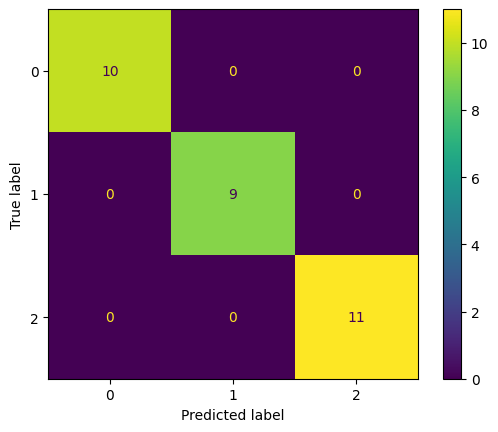

In [43]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

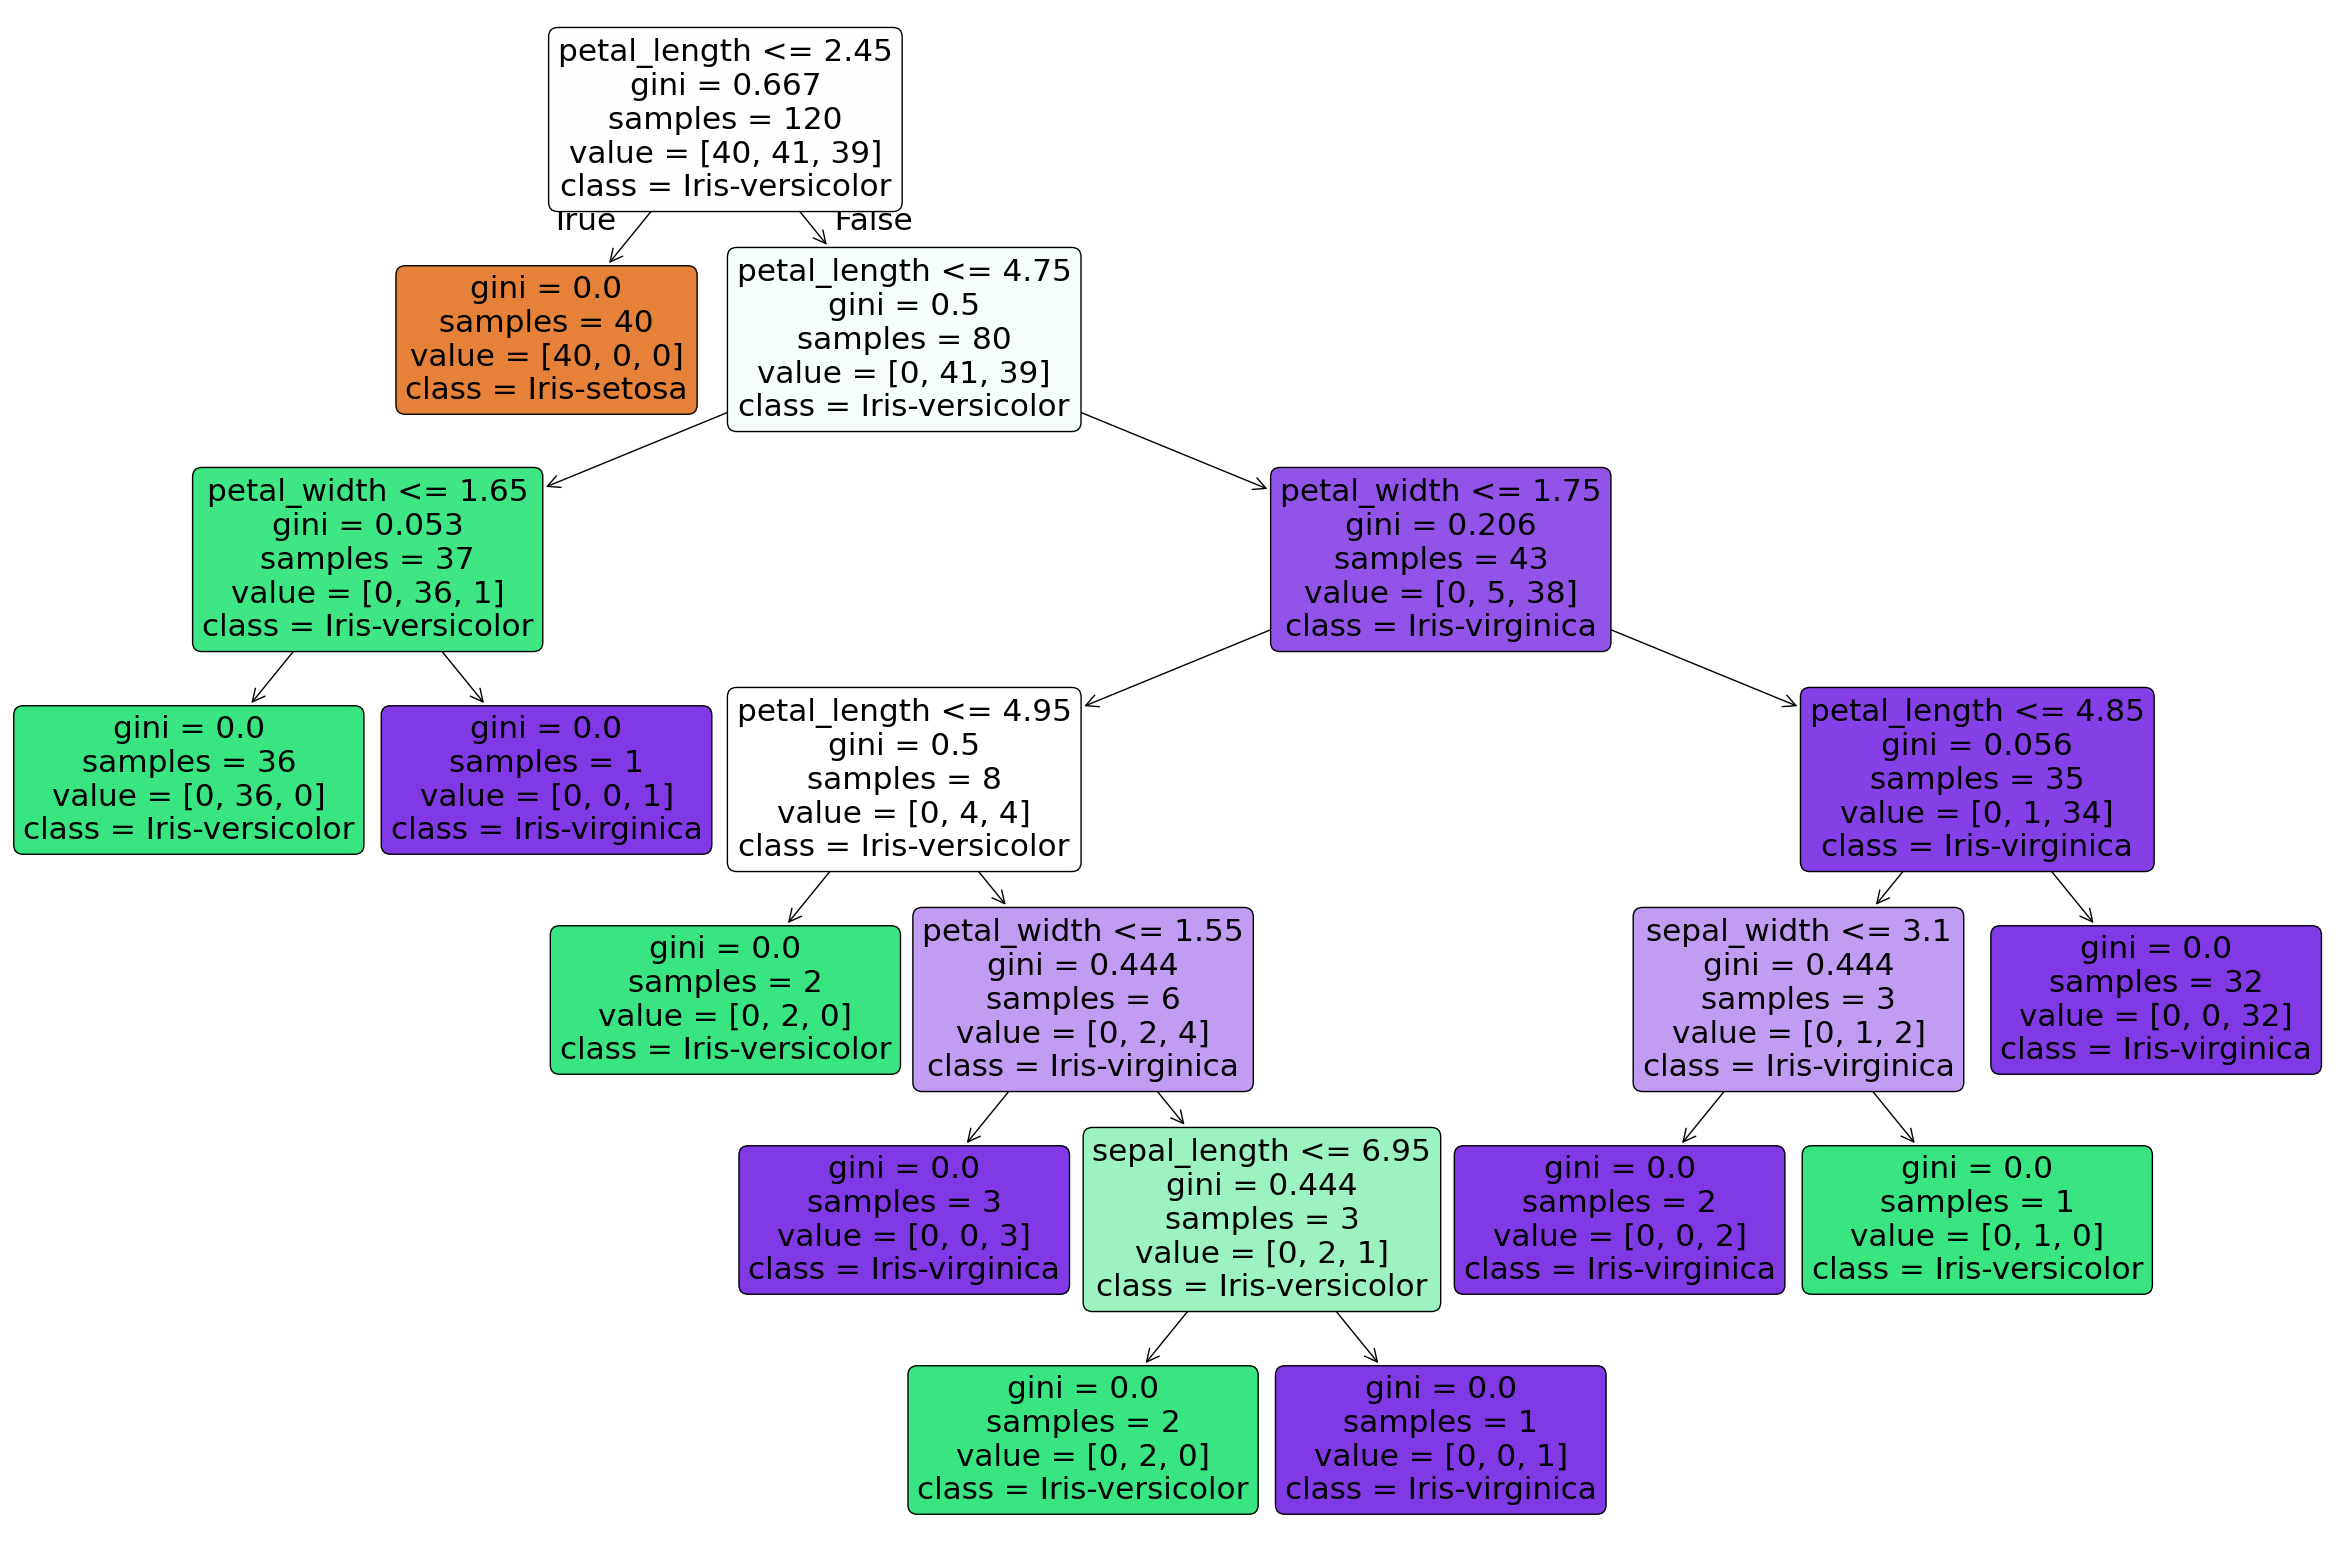

In [44]:
plt.figure(figsize=(30,20))
tree.plot_tree(
    model,
    feature_names=['sepal_length','sepal_width', 'petal_length', 'petal_width'], 
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled = True, rounded=True
    
    
)
plt.show()